In [2]:
import numpy as np
import nilearn
from nilearn import datasets, plotting, regions
import matplotlib.pyplot as plt
import matplotlib as mpl
from brainspace.utils.parcellation import map_to_labels, reduce_by_labels
import brainspace
import seaborn as sns
import hcp_utils as hcp
import pandas as pd
from brainspace.datasets import load_conte69, load_parcellation
from brainspace.plotting import plot_hemispheres
from modeling_utils import *
import os
surf_lh, surf_rh = load_conte69()
from nilearn.connectome import sym_matrix_to_vec
import pickle
import json
import seaborn as sns


pixdim[1,2,3] should be non-zero; setting 0 dims to 1


In [114]:
mpl.rcParams['svg.fonttype'] = 'none'

## Descriptive Stats

In [3]:
#data_paths = json.load(open('data_paths.json', 'r'))

data_paths = {
"COBRE-SCZ": "/Users/VictoriaShevchenko/Documents/PhD/SCZ/COBRE/clean_data/SCZ",
"COBRE-controls": "/Users/VictoriaShevchenko/Documents/PhD/SCZ/COBRE/clean_data/controls",
"LA5c": "/Users/VictoriaShevchenko/Documents/PhD/SCZ/LA5c/clean_data",
"SRPBS-1600-KTT": "/Users/VictoriaShevchenko/Documents/PhD/SCZ/SRPBS_1600/KTT/clean_data",
}

In [3]:
diagnosis_mapping = {
    'CONTROL': 0,
    'SCHZ': 1,
    'Schizophrenia_Strict': 1,
    'No_Known_Disorder': 0,
    4: 1,
    0: 0
}

In [131]:
participants = pd.read_csv('participants.csv')

In [193]:
schizophrenia_count = participants[participants['diagnosis'] == 1]['diagnosis'].count()
neurotypical_count = participants[participants['diagnosis'] == 0]['diagnosis'].count()
male_count = participants[participants['sex'] == 0]['sex'].count()
female_count = participants[participants['sex'] == 1]['sex'].count()

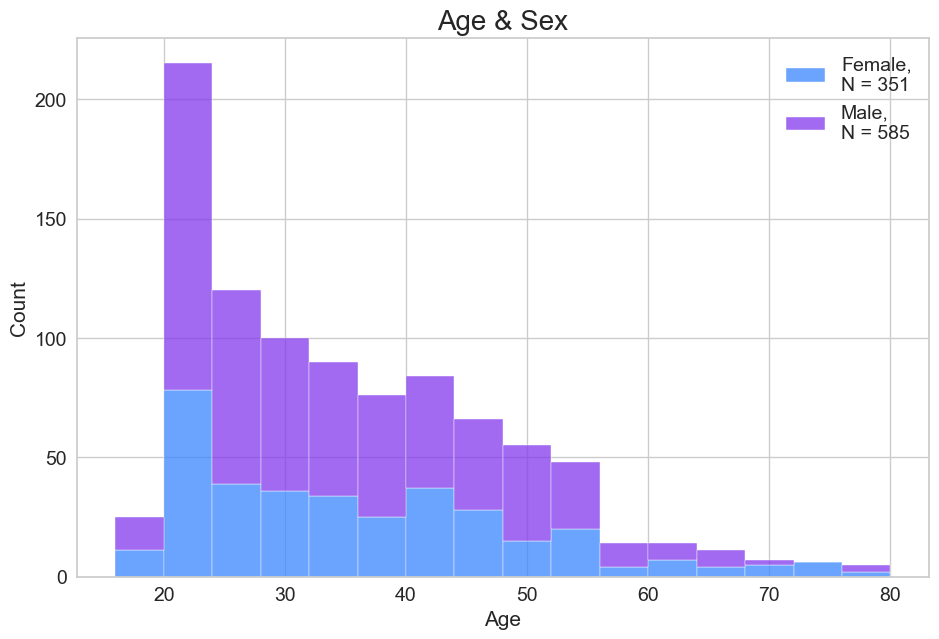

In [194]:

sns.set_style("whitegrid")
fig_dims = (11, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = participants,
             x = 'age', ax=ax, hue= 'sex', palette=["#8338ec", '#3a86ff'],multiple='stack',legend=False)
new_labels = [f'Female,\nN = {female_count}' , f'Male,\nN = {male_count}']
plt.legend(new_labels, fontsize = 14)

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.title('Age & Sex', fontsize= 20)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.savefig("../../figures/age_sex.svg", format = "svg", dpi = 300, bbox_inches='tight')

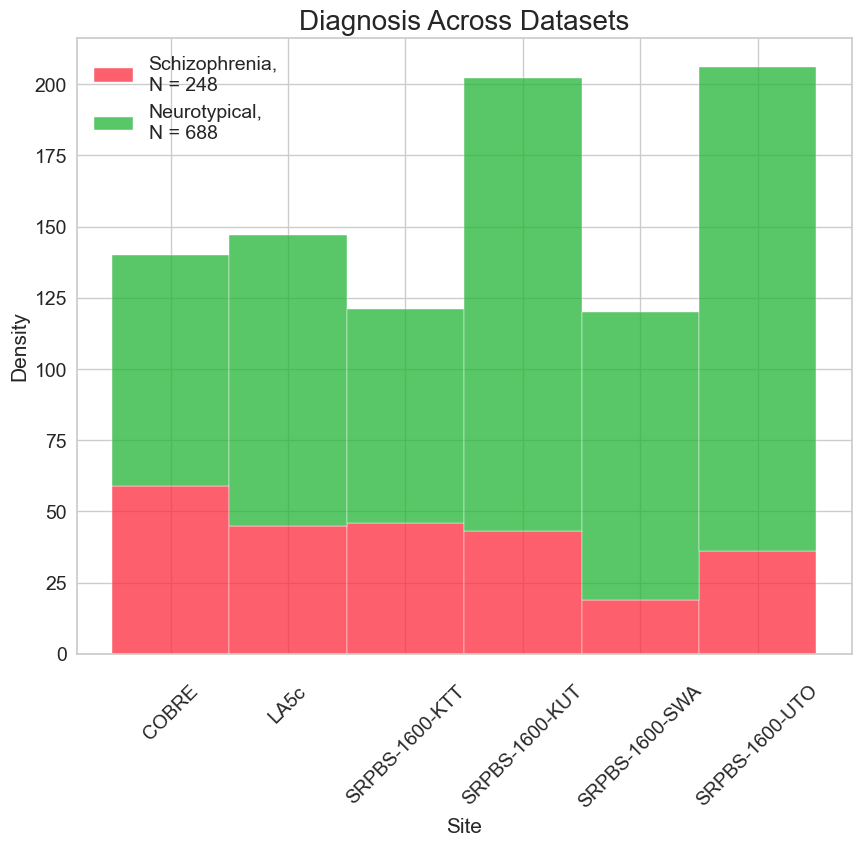

In [195]:
sns.set_style("whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = participants,
             x = 'dataset', ax=ax, hue = "diagnosis", palette=["#21b534", '#fd2b3b'], multiple="stack", legend = False)          
new_labels = [f'Schizophrenia,\nN = {schizophrenia_count}' , f'Neurotypical,\nN = {neurotypical_count}']
plt.legend(new_labels, fontsize = 14)

ax.tick_params(axis='x', labelsize= 14, rotation = 45)
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Diagnosis Across Datasets', fontsize= 20)
ax.tick_params(axis='x', pad=20)
plt.savefig("../../figures/dataset_diag.svg", format = "svg", dpi = 300, bbox_inches='tight')

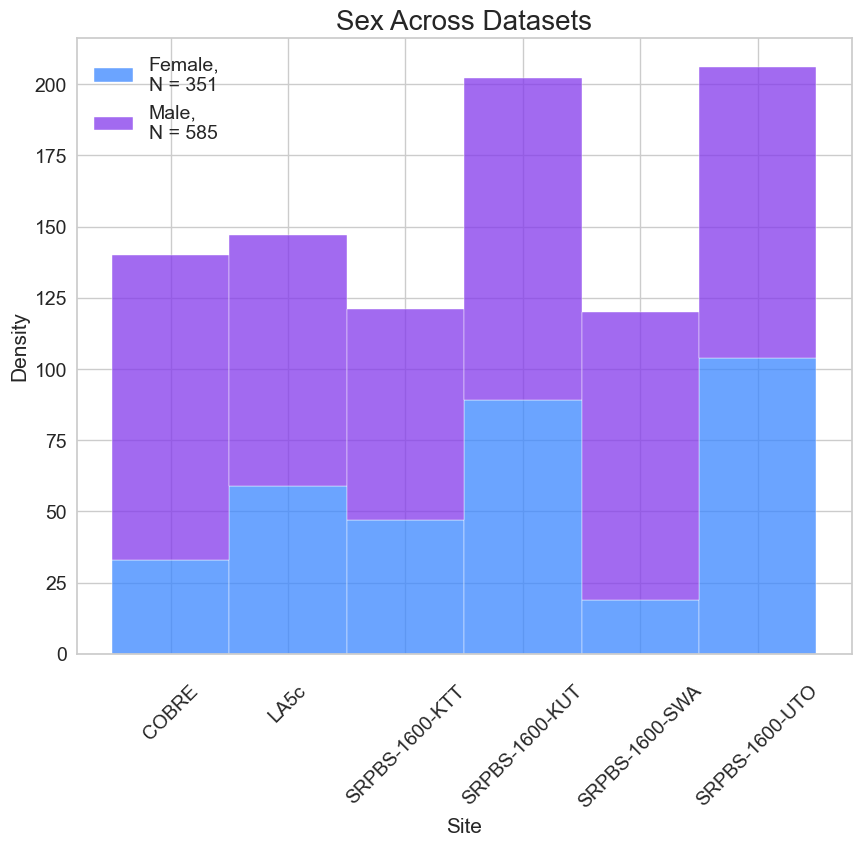

In [196]:
sns.set_style("whitegrid")
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.histplot(data = participants,
             x = 'dataset', ax=ax, hue = "sex", palette=["#8338ec", '#3a86ff'], multiple="stack", legend = False)    
new_labels = [f'Female,\nN = {female_count}' , f'Male,\nN = {male_count}']
plt.legend(new_labels, fontsize = 14)

ax.tick_params(axis='x', labelsize= 14, rotation = 45)
ax.tick_params(axis='y', labelsize= 14) 
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Density', fontsize = 15)
plt.title('Sex Across Datasets', fontsize= 20)
ax.tick_params(axis='x', pad=20)
plt.savefig("../../figures/dataset_sex.svg", format = "svg", dpi = 300, bbox_inches='tight')

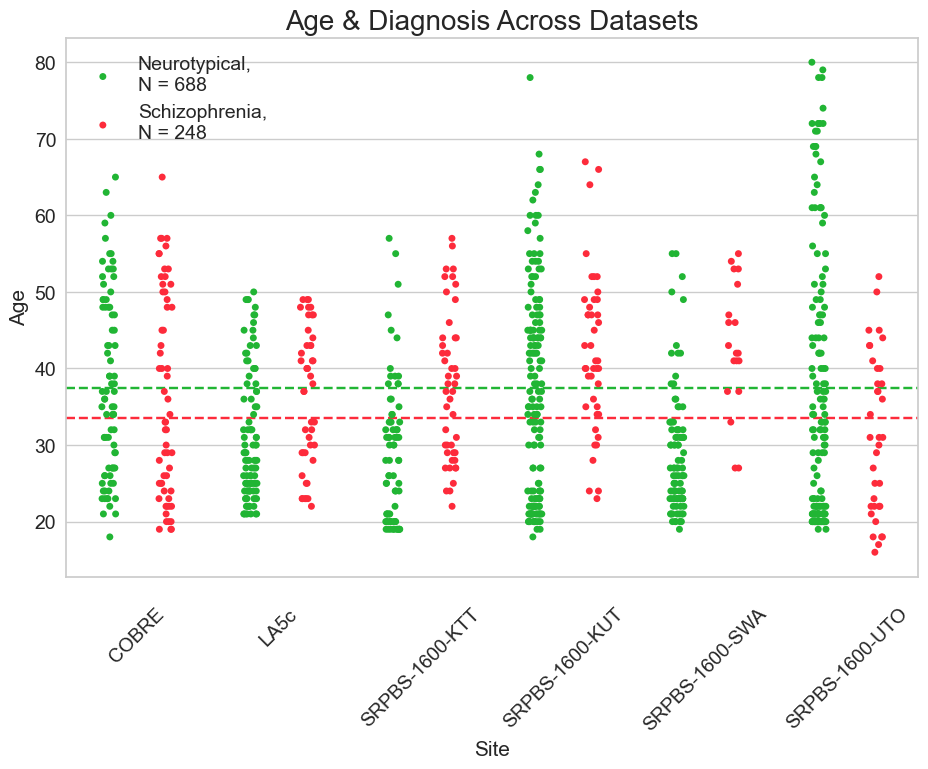

In [198]:
sns.set_style("whitegrid")
fig_dims = (11, 7)
fig, ax = plt.subplots(figsize=fig_dims)
bins = range(20)
sns.stripplot(data = participants, x = "dataset",
             y = 'age', ax=ax, hue= 'diagnosis', palette=["#21b534", '#fd2b3b'],legend=False, dodge = True)
new_labels = [f'Neurotypical,\nN = {neurotypical_count}', f'Schizophrenia,\nN = {schizophrenia_count}']
schizophrenia_mean_age = participants[participants['diagnosis'] == 1]['age'].mean()
neurotypical_mean_age = participants[participants['diagnosis'] == 0]['age'].mean()
ax.axhline(y=schizophrenia_mean_age, color='#21b534', linestyle='--')
ax.axhline(y=neurotypical_mean_age, color='#fd2b3b', linestyle='--')
plt.legend(new_labels, fontsize = 14)

ax.tick_params(axis='x', labelsize= 14, rotation = 45) 
ax.tick_params(axis='y', labelsize= 14) 
plt.title('Age & Diagnosis Across Datasets', fontsize= 20)
plt.xlabel('Site', fontsize = 15)
plt.ylabel('Age', fontsize = 15)
ax.tick_params(axis='x', pad=20)
plt.savefig("../../figures/age_diag_dataset.svg", format = "svg", dpi = 300, bbox_inches='tight')

In [184]:
participants[participants['diagnosis'] == 1]['age'].mean()
participants[participants['diagnosis'] == 0]['age'].mean()

33.55232558139535

## Workflow Figures

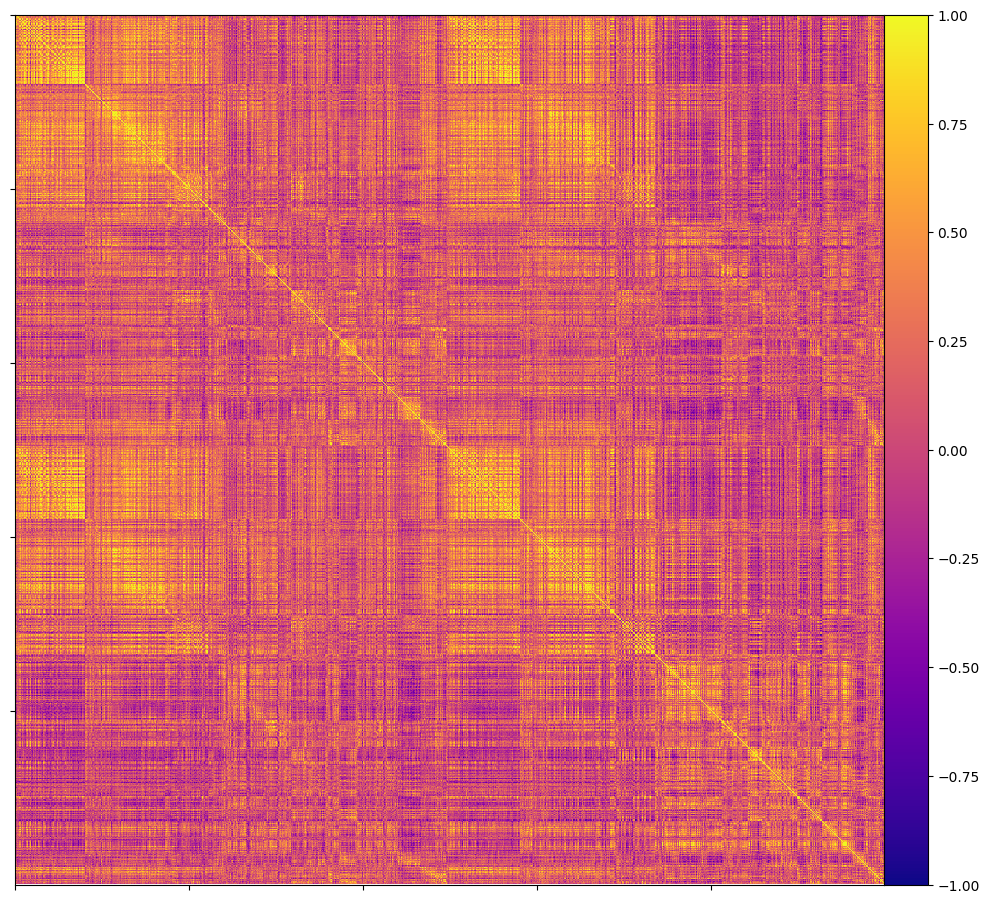

In [28]:
matrix = np.load("/Users/VictoriaShevchenko/Documents/PhD/SCZ/LA5c/clean_data/sub-10189/func/z-conn-matrix-sub-10189-rest-schaefer1000.npy")[0]
corr_plot = plotting.plot_matrix(matrix, figure=(10, 10), vmax=1, vmin=-1, cmap = 'plasma')


In [40]:
gradients = np.load("/Users/VictoriaShevchenko/Documents/PhD/SCZ/LA5c/clean_data/sub-10189/func/aligned-10gradients-sub-10189-rest-schaefer1000.npy")[0]


In [11]:
from neuromaps.datasets import fetch_fslr
from surfplot import Plot
from brainspace.datasets import load_parcellation

surfaces = fetch_fslr()
lh, rh = surfaces['inflated']
lh_parc, rh_parc = load_parcellation('schaefer', 1000)
schaefer_labels_1000 = load_parcellation('schaefer', scale=1000, join=True)

In [12]:
schaefer_region_names = nilearn.datasets.fetch_atlas_schaefer_2018(1000, yeo_networks = 7)
#schaefer_coords = plotting.find_parcellation_cut_coords(schaefer_region_names["maps"])

In [33]:
schaefer_coords[900]

array([ 13.84463895, -75.37490883,  43.94821298])

In [44]:
grads = [None] * 3

for i, g in enumerate(gradients.T[:3]):
    grads[i] = map_to_labels(g, schaefer_labels_1000, mask=schaefer_labels_1000 != 0, fill=np.nan)

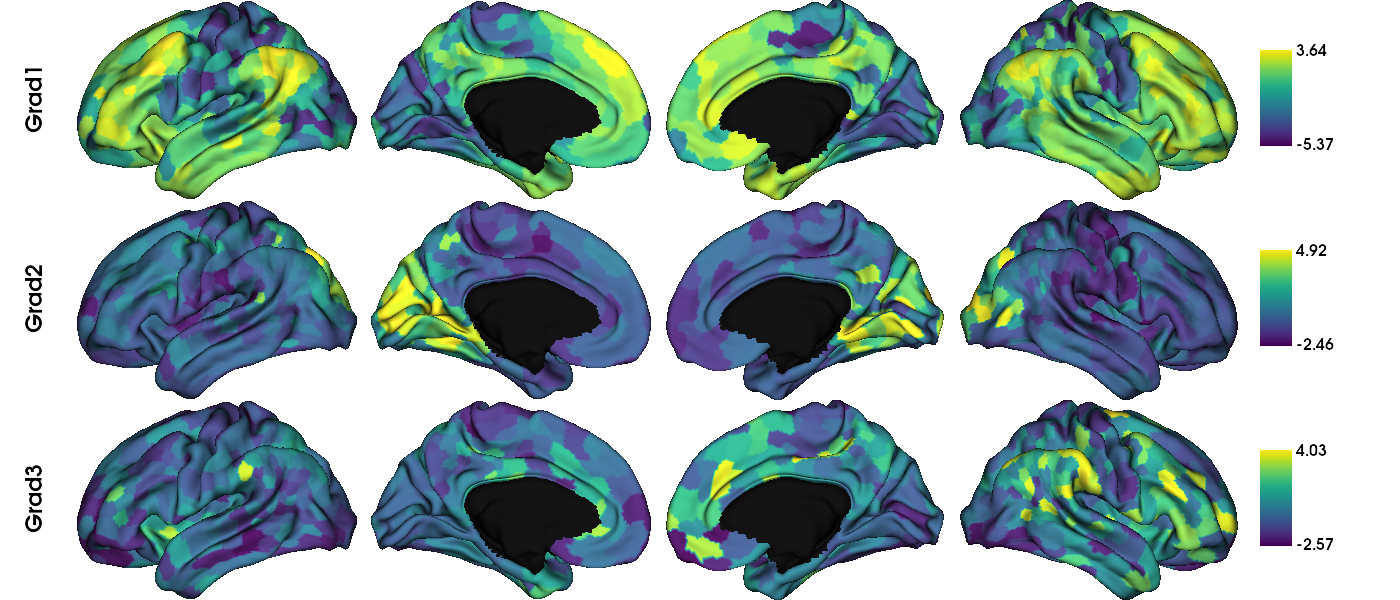

In [51]:
plot_hemispheres(surf_lh, surf_rh, array_name=grads, size=(1400, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.8, embed_nb = True)

In [56]:
dispersion = [np.load(f"/Users/VictoriaShevchenko/Documents/PhD/SCZ/LA5c/clean_data/sub-10189/func/{i}") for i in os.listdir("/Users/VictoriaShevchenko/Documents/PhD/SCZ/LA5c/clean_data/sub-10189/func/") if "disp" in i]

In [57]:
dispersion = np.array(dispersion)
dispersion.shape

(3, 1000)

In [58]:
disp = [None] * 3
for i, d in enumerate(dispersion):
    disp[i] = map_to_labels(d, schaefer_labels_1000, mask=schaefer_labels_1000 != 0, fill=np.nan)

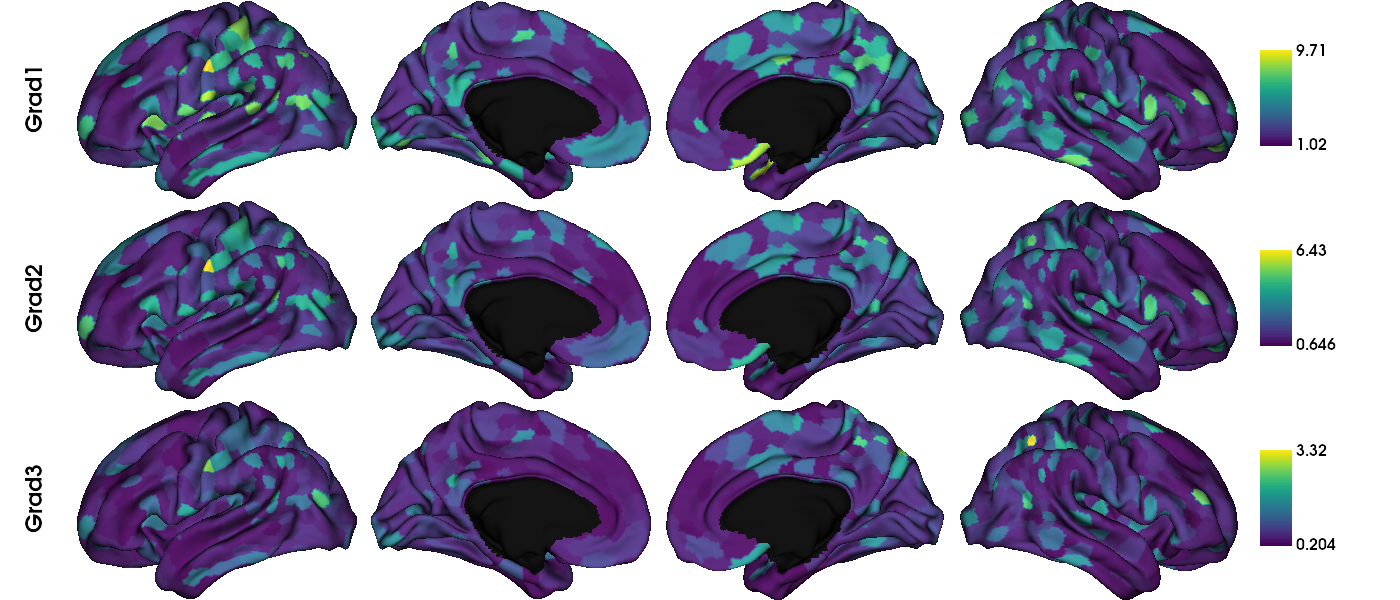

In [59]:
plot_hemispheres(surf_lh, surf_rh, array_name=disp, size=(1400, 600), cmap='viridis',
                 color_bar=True, label_text=['Grad1', 'Grad2', 'Grad3'], zoom=1.8, embed_nb = True)

In [60]:
len(np.arange(5, 505, 5))

100

# Results

## Feature Importance

In [95]:
feature_importance = np.load("feature_importance_matrix.npy")
feature_importance = np.max(feature_importance, axis = 1)
feature_importance = (feature_importance - np.min(feature_importance)) / (np.max(feature_importance) - np.min(feature_importance))

KeyboardInterrupt: 

In [ ]:
labels = np.load("feature_labels.npy")
labels = np.array([label.split("_")[0] for label in labels])

In [ ]:
feature_importance_df = pd.DataFrame({"Feature Type": labels, "Importance": feature_importance})
feature_importance_df["Feature Type"] = feature_importance_df["Feature Type"].map({"conn":"Connectivity", "grad":"Gradients", "disp":"Dispersion"}) 

In [ ]:
feature_importance_df['Percentile'] = np.percentile(feature_importance_df['Importance'], feature_importance_df['Importance'])

### Load Feature Importance With Percentiles

In [126]:
feature_importance_grads = pd.read_csv("results/importance_grads.csv")
feature_importance_conn = pd.read_csv("results/importance_conn.csv")
feature_importance_disp = pd.read_csv("results/importance_disp.csv")


In [127]:
feature_importance_grads["Percentile"] = feature_importance_grads["Percentile"].values.astype(int)
feature_importance_conn["Percentile"] = feature_importance_conn["Percentile"].values.astype(int)
feature_importance_disp["Percentile"] = feature_importance_disp["Percentile"].values.astype(int)

In [128]:
feature_importance_df = pd.concat([feature_importance_grads, feature_importance_conn, feature_importance_disp])

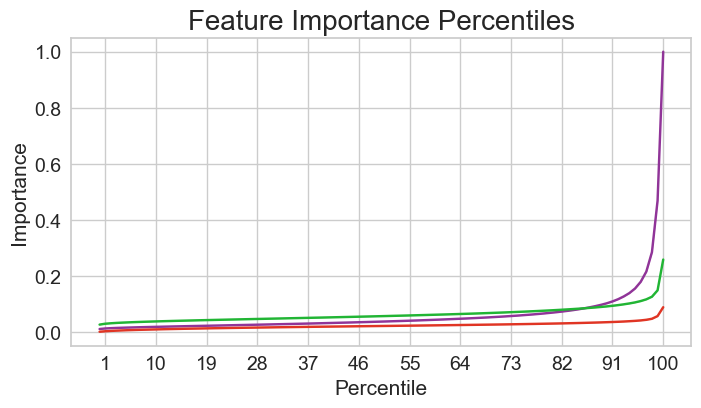

In [130]:
fig_dims = (8, 4)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_style("whitegrid")

# create the line plot with percentile tick labels
sns.lineplot(data=feature_importance_df, x="Percentile", y = "Importance", hue = "Feature Type", palette=["#903498", '#21b534', '#e03524'], ax=ax, legend = False)
plt.xticks(np.arange(1, 101, 9), np.arange(1, 101, 9))

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.title('Feature Importance Percentiles', fontsize = 20)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)

plt.savefig("../../figures/feature_importance_percentiles.svg", format = "svg", dpi = 300, bbox_inches='tight')


In [103]:
percentile = feature_importance_grads['Importance'].quantile(0.99)
feature_importance_grads = feature_importance_grads[feature_importance_grads['Importance'] >= percentile]

In [104]:
percentile = feature_importance_conn['Importance'].quantile(0.99)
feature_importance_conn = feature_importance_conn[feature_importance_conn['Importance'] >= percentile]

In [105]:
percentile = feature_importance_disp['Importance'].quantile(0.99)
feature_importance_disp = feature_importance_disp[feature_importance_disp['Importance'] >= percentile]

In [106]:
feature_importance_df = pd.concat([feature_importance_grads, feature_importance_conn, feature_importance_disp])

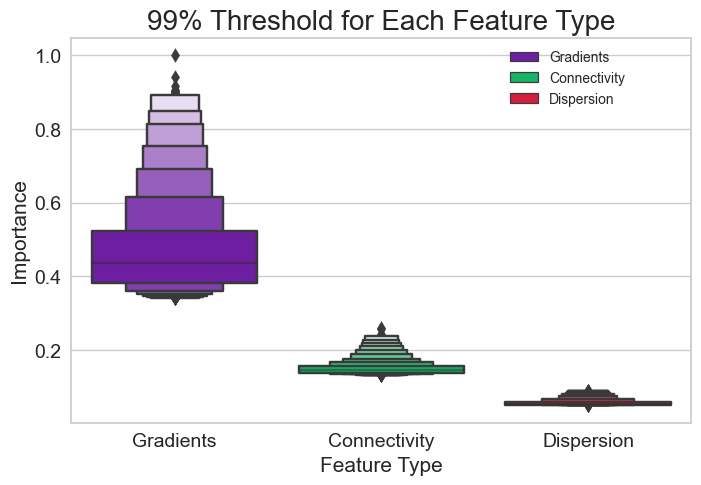

In [125]:
sns.set_style("whitegrid")
fig_dims = (8, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxenplot(data=feature_importance_df, x="Feature Type", y="Importance", hue="Feature Type", palette = ["#7209b7", "#00cc66", "#f2002b"], dodge = False, scale="area")

ax.tick_params(axis='x', labelsize= 14) 
ax.tick_params(axis='y', labelsize= 14) 
plt.title(label = "99% Threshold for Each Feature Type", fontsize = 20)
ax.xaxis.label.set_size(15)
ax.yaxis.label.set_size(15)
handles, labels = ax.get_legend_handles_labels()
lgd = ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.8,1))
plt.savefig("../../figures/feature_importance_top1.svg", format = "svg", dpi = 300, bbox_extra_artists=(lgd,), bbox_inches='tight')

## Model Performance

In [199]:
results_dir = "results"

In [226]:
results = pd.read_csv(f"{results_dir}/model_results.csv")
dummy_acc = results.loc[results['Model'] == 'Dummy Classifier'].set_index('N features')['Accuracy']
dummy_filtered_results = results.groupby('N features').apply(lambda x: x.loc[x['Accuracy'] > dummy_acc[x.name]])
dummy_filtered_results = dummy_filtered_results.reset_index(drop=True)
best_models = results.groupby('N features').apply(lambda x: x.loc[x['Accuracy'].idxmax()])
best_models = best_models.reset_index(drop=True)

In [228]:
dummy_filtered_results[dummy_filtered_results["N features"] == 100]

Unnamed: 0                     Model  Accuracy     AUC  Recall   Prec.  \
0           0  Random Forest Classifier    0.7450  0.7139  0.2183  0.5507   
1           1    Extra Trees Classifier    0.7449  0.7109  0.1317  0.5883   

       F1  N features  Pval Acc  Pval AUC  Rank  
0  0.3104       100.0       1.0       1.0     1  
1  0.2106       100.0       1.0       1.0     2

In [227]:
dummy_filtered_results_ranked = []
for n in dummy_filtered_results["N features"].unique():
    df=dummy_filtered_results[dummy_filtered_results["N features"] == n].sort_values(by="Accuracy", ascending=False).reset_index(drop=True)
    print(len(df))
    df["Rank"] = np.arange(1, len(df) + 1)
    dummy_filtered_results_ranked.append(df)
dummy_filtered_results = pd.concat(dummy_filtered_results_ranked)

2
4
4
4
4
4
5
6
6
7
8
8
7
8
7
8
8
7
7
8
7
9
8
9
9
9
9
9
9
9
9
9
9
9
9
10
10
9
10
9
9
9
10
10
10
10
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
10
10
10
10
10
10
10
10
10
10
10
10
10
9
10
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10

In [201]:
from scipy.stats import percentileofscore

for n_features in best_models["N features"].unique():
    n_features = int(n_features)
    try:
        null_dist_acc = np.load(f"results/null_dist/null_dist_{n_features}.npy")[:, 0]
        null_dist_auc = np.load(f"results/null_dist/null_dist_{n_features}.npy")[:, 1]

        best_acc = best_models[best_models["N features"] == float(n_features)]["Accuracy"].values[0]
        best_auc = best_models[best_models["N features"] == float(n_features)]["AUC"].values[0]

        pval_acc = 1-percentileofscore(null_dist_acc, best_acc) / 100
        pval_auc = 1-percentileofscore(null_dist_auc, best_auc) / 100

        best_models.loc[best_models["N features"] == float(n_features), "Pval Acc"] =  pval_acc
        best_models.loc[best_models["N features"] == float(n_features), "Pval AUC"] =  pval_auc
    except:
        pass

In [202]:
results_pca_data = pd.read_csv(f"{results_dir}/pca_model_results.csv")
best_model_pca = results_pca_data[results_pca_data["Accuracy"] == results_pca_data["Accuracy"].max()]
n_models = len(best_model_pca)
n_levels = len(results["N features"].unique())
best_model_pca = pd.concat([best_model_pca]*n_levels, ignore_index=True)
best_model_pca["N features"] = list(results["N features"].unique()) * n_models


In [203]:
confound_results = pd.read_csv(f"{results_dir}/confound_model_results.csv")
counfound_dummy_filtered_results = confound_results[confound_results["Accuracy"] == confound_results["Accuracy"].max()]
n_models = len(counfound_dummy_filtered_results)
n_levels = len(results["N features"].unique())
counfound_dummy_filtered_results = pd.concat([counfound_dummy_filtered_results]*n_levels, ignore_index=True)
counfound_dummy_filtered_results["N features"] = list(results["N features"].unique()) * n_models



In [8]:
dummy_results = results.loc[results['Model'] == 'Dummy Classifier']

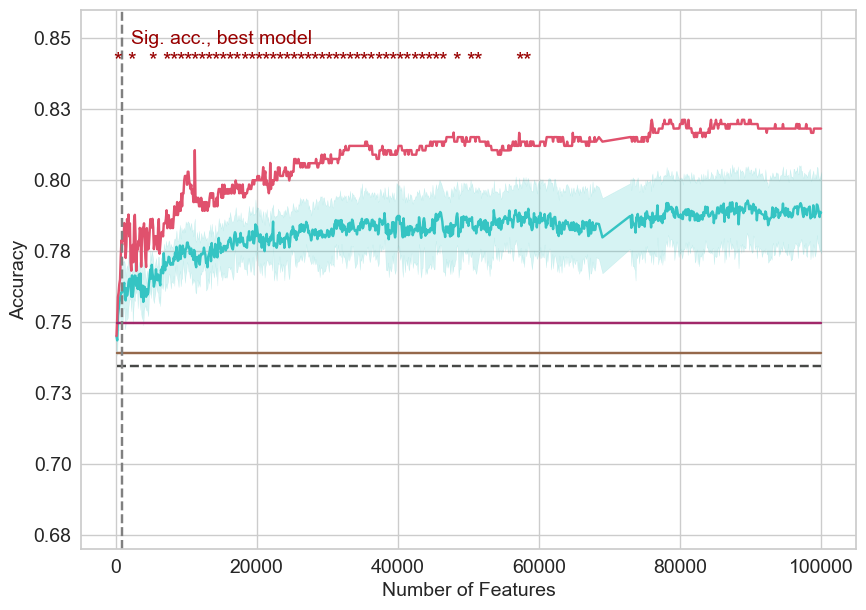

In [9]:
from matplotlib.ticker import FormatStrFormatter

sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(
    data=dummy_filtered_results,
    x="N features", y="Accuracy", color="#35c4c3"
)
sns.lineplot(
    data=best_models, estimator = None,
    x="N features", y="Accuracy", color="#e0516d"
)
sns.lineplot(
    data=dummy_results, estimator = None,
    x="N features", y="Accuracy", color="#464846", linestyle = "--"
)
sns.lineplot(
    data=counfound_dummy_filtered_results,x = "N features", y="Accuracy", color="#95684b"
)
sns.lineplot(
    data=best_model_pca,x = "N features", y="Accuracy", color="#a1286a"
)

n_features = best_models["N features"].values
pval_acc = best_models["Pval Acc"].values

ax.set(ylim=(0.67, 0.86))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

for i in range(1, len(n_features), 10):
    if pval_acc[i] < 0.05:
        ax.annotate("*", xy=(n_features[i], 0.84), fontsize=16, ha="center", color = "#980000", label = "Best model: significance")
ax.annotate("Sig. acc., best model", xy=(15000, 0.848), fontsize=14, ha="center", color = "#980000")

plt.axvline(x=936, color='gray', linestyle='--')
ax.set_xlabel("Number of Features", fontsize=14)
ax.set_ylabel("Accuracy", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)
plt.savefig("../../figures/Accuracy.svg", format = "svg", dpi = 300, bbox_inches='tight')

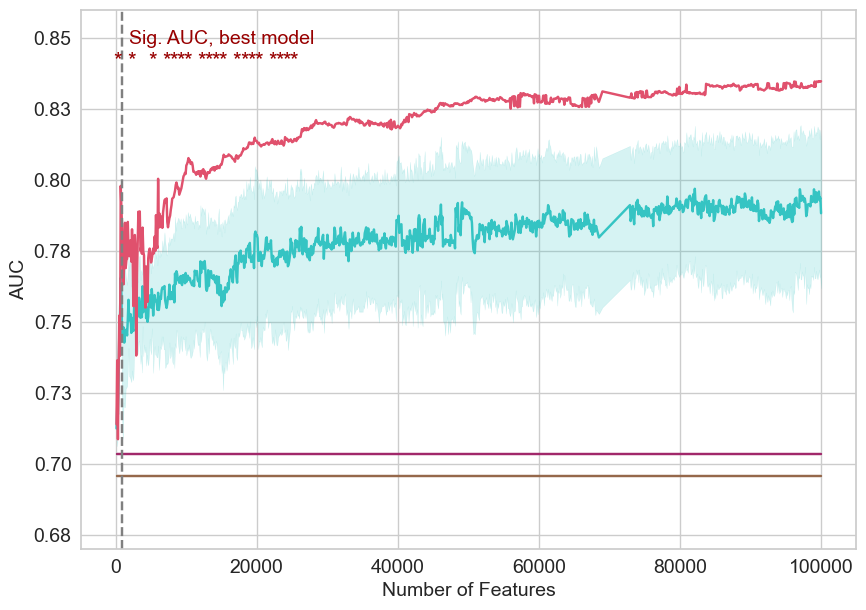

In [99]:

sns.set_style("whitegrid")
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(
    data=dummy_filtered_results[dummy_filtered_results["AUC"]>0],
    x="N features", y="AUC", color="#35c4c3",
)
sns.lineplot(
    data=best_models[best_models["AUC"]>0], estimator = None,
    x="N features", y="AUC", color="#e0516d"
)
# sns.lineplot(
#     data=dummy_results, estimator = None,
#     x="N features", y="AUC", color="#464846", linestyle = "--", label = "Dummy classifier"
# )
sns.lineplot(
    data=counfound_dummy_filtered_results,x = "N features", y="AUC", color="#95684b"
)
sns.lineplot(
    data=best_model_pca,x = "N features", y="AUC", color="#a1286a"
)
ax.set(ylim=(0.67, 0.86))
ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

pval_auc = best_models["Pval AUC"].values

for i in range(1, len(n_features), 10):
    if pval_auc[i] < 0.05:
        ax.annotate("*", xy=(n_features[i], 0.84), fontsize=16, ha="center", color = "#980000", label = "Best model: significance")
ax.annotate("Sig. AUC, best model", xy=(15000, 0.848), fontsize=14, ha="center", color = "#980000")

plt.axvline(x=936, color='gray', linestyle='--')
ax.set_xlabel("Number of Features", fontsize=14)
ax.set_ylabel("AUC", fontsize=14)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

plt.savefig("../../figures/AUC.svg", format = "svg", dpi = 300, bbox_inches='tight')

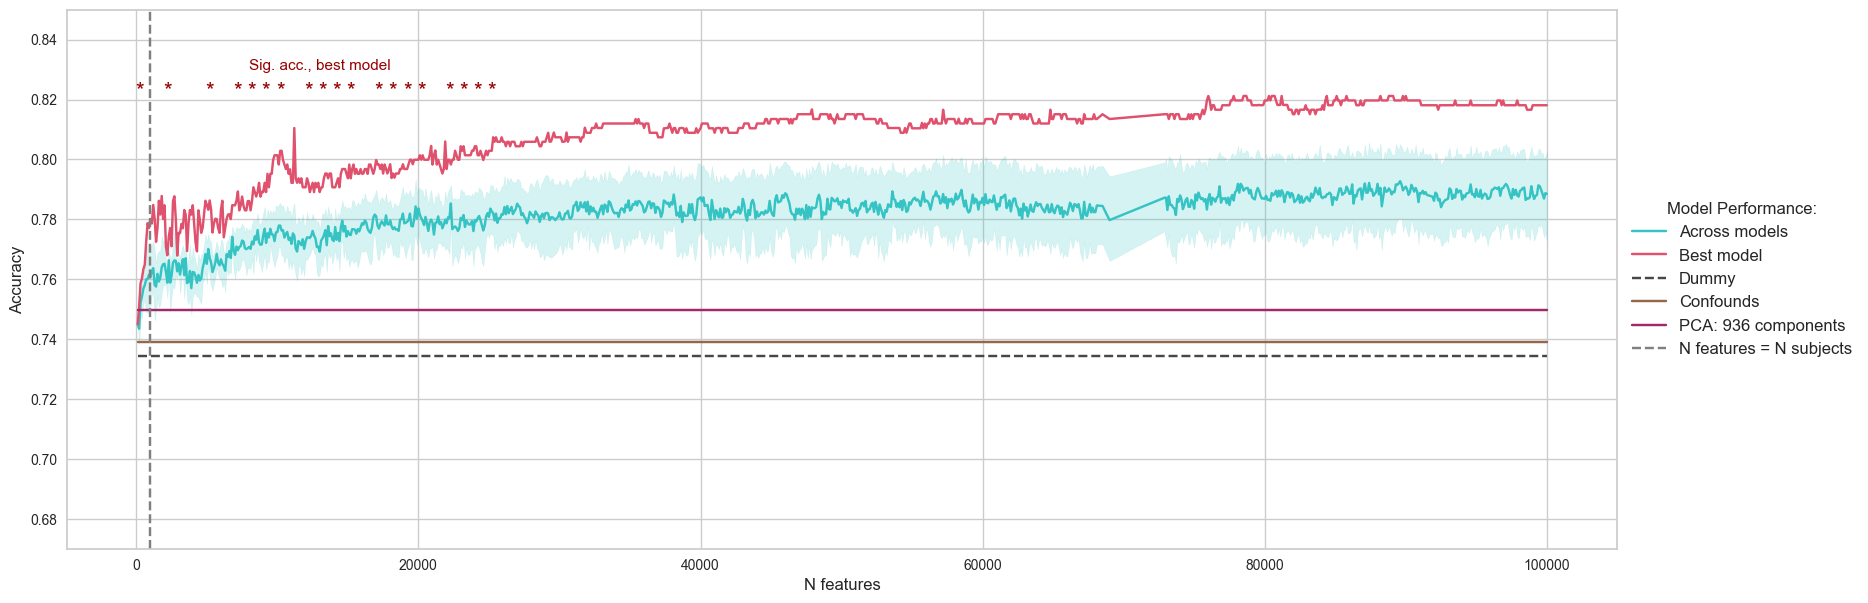

In [106]:
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)

sns.lineplot(
    data=dummy_filtered_results,
    x="N features", y="Accuracy", color="#35c4c3", label = "Across models"
)
sns.lineplot(
    data=best_models, estimator = None,
    x="N features", y="Accuracy", color="#e0516d", label = "Best model"
)
sns.lineplot(
    data=dummy_results, estimator = None,
    x="N features", y="Accuracy", color="#464846", linestyle = "--", label = "Dummy"
)
sns.lineplot(
    data=counfound_dummy_filtered_results,x = "N features", y="Accuracy", color="#95684b", label = "Confounds"
)
sns.lineplot(
    data=best_model_pca,x = "N features", y="Accuracy", color="#a1286a", label = "PCA: 936 components"
)
plt.axvline(x=936, color='gray', linestyle='--', label = "N features = N subjects")
ax.set(ylim=(0.67, 0.85))
for i in range(1, len(n_features), 10):
    if pval_auc[i] < 0.05:
        ax.annotate("*", xy=(n_features[i], 0.821), fontsize=16, ha="center", color = "#980000", label = "Best model: significance")
ax.annotate("Sig. acc., best model", xy=(13000, 0.83), fontsize=11, ha="center", color = "#980000")

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=12, title = "Model Performance:")
# ax.set_xlabel("Number of Features", fontsize=14)
# ax.set_ylabel("AUC", fontsize=14)
# ax.set_xticklabels(ax.get_xticklabels(), fontsize=14)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

plt.savefig("../../figures/legend.svg", format = "svg", dpi = 300, bbox_inches='tight')

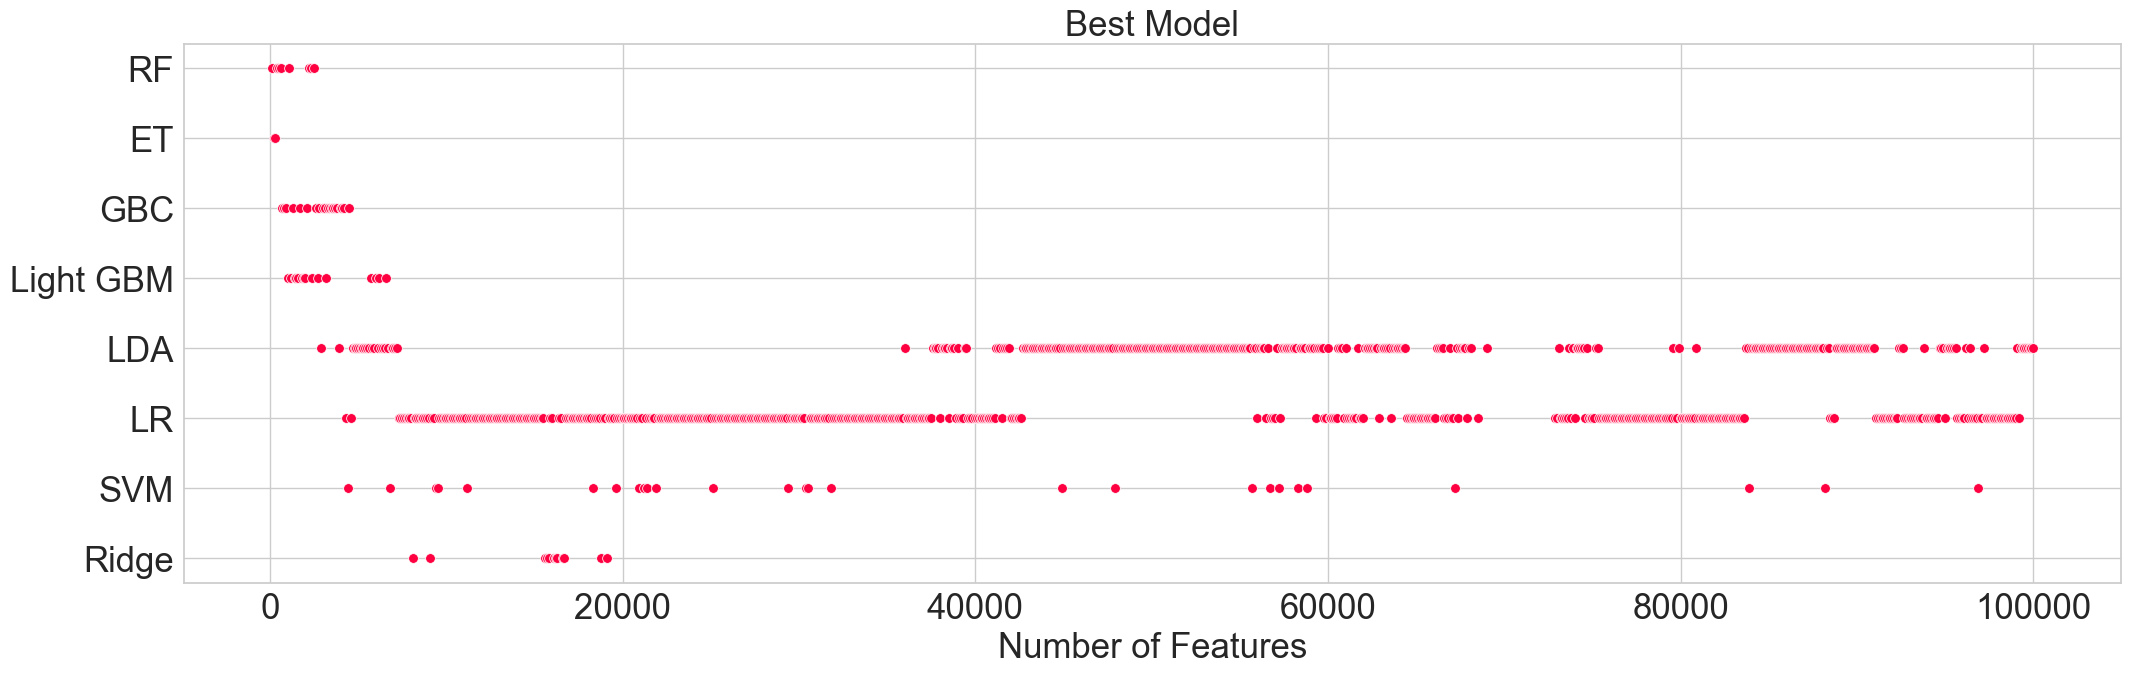

In [241]:
sns.set_style("whitegrid")
fig_dims = (25, 7)
fig, ax = plt.subplots(figsize=fig_dims)
best_models_rank = best_models.copy()
best_models_rank["Model"] = best_models_rank["Model"].astype(str)

sns.scatterplot(
    data=best_models_rank,
    x="N features", y="Model", color="#ff0040",
)
y_labels = ["RF", "ET", "GBC", "Light GBM", "LDA", "LR", "SVM", "Ridge"]
ax.set_xlabel("Number of Features", fontsize=25)
ax.set_ylabel("")
ax.set_yticklabels(y_labels)
ax.set_xticklabels(ax.get_xticklabels(), fontsize=25)
ax.set_yticklabels(ax.get_yticklabels(), fontsize=25)
plt.title("Best Model", fontsize=25)
plt.savefig("../../figures/model_rank.svg", format = "svg", dpi = 300,bbox_inches='tight')

In [230]:
# assuming the DataFrame is stored in a variable called 'df'
# get the unique values in the "N features" column
unique_values = dummy_filtered_results["N features"].unique()

# select the 1st and every 5th unique value
selected_values = unique_values[::10].tolist()
selected_values.insert(0, unique_values[0])

# filter the DataFrame to keep only the rows with "N features" values that match the selected unique values
subset_df = dummy_filtered_results[dummy_filtered_results["N features"].isin(selected_values)]


In [225]:
subset_df["Rank"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [215]:
subset_df["Rank"].unique()

array([ 1. ,  2. ,  3. ,  4. ,  1.5,  5. ,  6. ,  7. ,  8. ,  9. ,  5.5,
        4.5, 10. ,  6.5,  2.5,  7.5,  3.5,  8.5,  9.5])

In [13]:
def get_feature_regions(df, surf = True):
    grad_indices = []
    region_indices = []

    for column in df.columns:
        value_index = int(column.split("_")[-1])
        i_grad = int(value_index/1000)
        i_region = int(str(value_index)[-3:])
        grad_indices.append(i_grad)
        region_indices.append(i_region)

    regions_grads = df = pd.DataFrame(np.zeros((1000, 200)))

    feat_indices = regions_grads.stack().reset_index()
    feat_indices.columns = ["i_row", "i_column", "value"]
    feat_indices = feat_indices[["i_row", "i_column"]].to_numpy().tolist()

    for i_row, i_column in feat_indices:
        if i_row in region_indices and i_column in grad_indices:
            regions_grads.iloc[i_row, i_column] = 1

    regions = regions_grads.sum(axis = 1).values
    if surf:
        schaefer_labels_1000 = load_parcellation('schaefer', scale=1000, join=True)
        regions = map_to_labels(regions, schaefer_labels_1000, mask=schaefer_labels_1000 != 0, fill=np.nan)
    return regions

In [7]:
lh, rh = surfaces['veryinflated']

In [74]:
def get_additional_regions(df_new, df_prev, surf = True):
    regions_new = get_feature_regions(df_new, False)
    regions_prev = get_feature_regions(df_prev, False)
    reg_add = np.where((regions_new > 0) & (regions_prev > 0), 0, regions_new)
    if surf:
        schaefer_labels_1000 = load_parcellation('schaefer', scale=1000, join=True)
        reg_add = map_to_labels(reg_add, schaefer_labels_1000, mask=schaefer_labels_1000 != 0, fill=np.nan)
    return reg_add

In [80]:
max(get_feature_regions(pd.read_csv(f"best_features/200_best_features.csv"), True))

53.0

In [81]:
max(get_additional_regions(pd.read_csv(f"best_features/200_best_features.csv"), pd.read_csv(f"best_features/100_best_features.csv"), True))

53.0

In [82]:
get_additional_regions(pd.read_csv(f"best_features/{best_feature_csvs[1]}"), pd.read_csv(f"best_features/{prev_csv}"), True)

array([  0.,   0., 200., ..., 200., 200., 200.])

In [30]:
from matplotlib.colors import ListedColormap

colors = ['green']
cmap = ListedColormap(colors, 'regions', N=1)

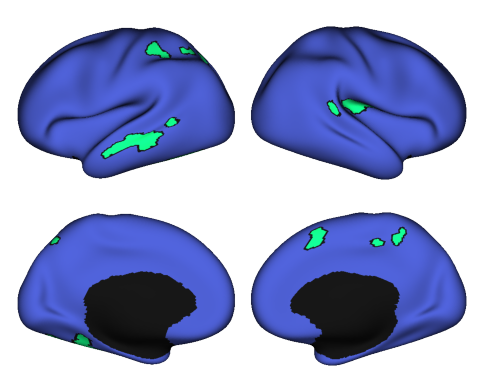

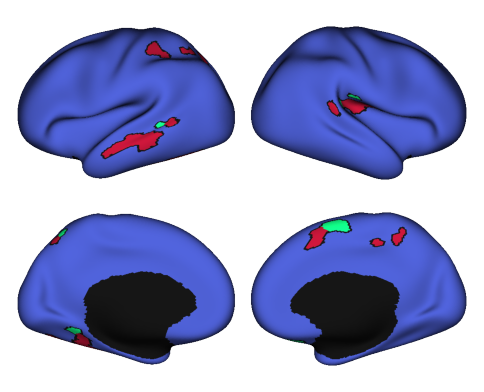

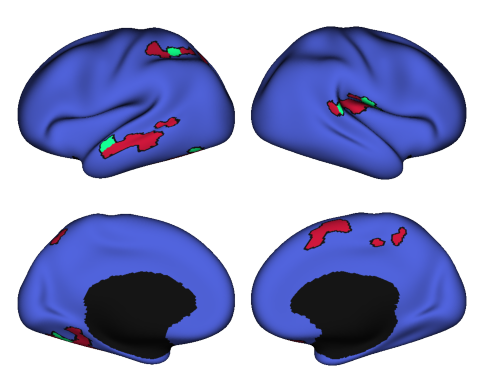

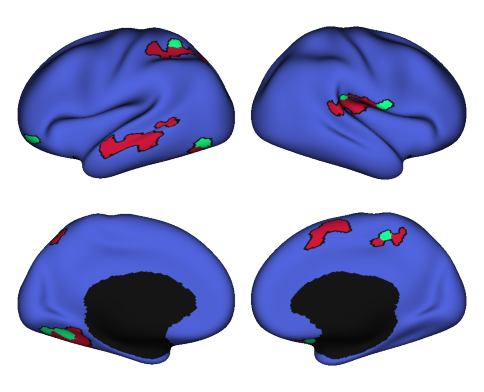

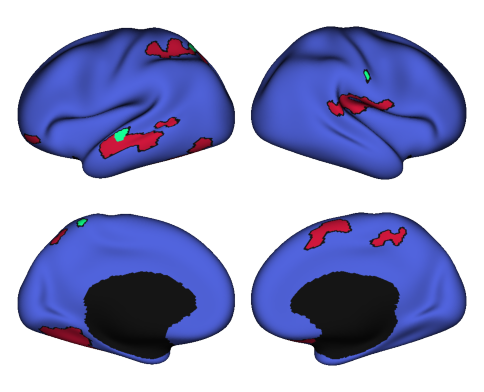

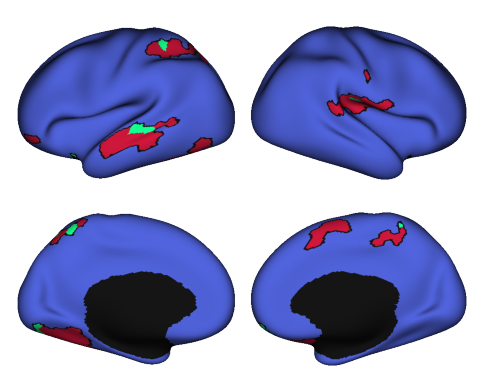

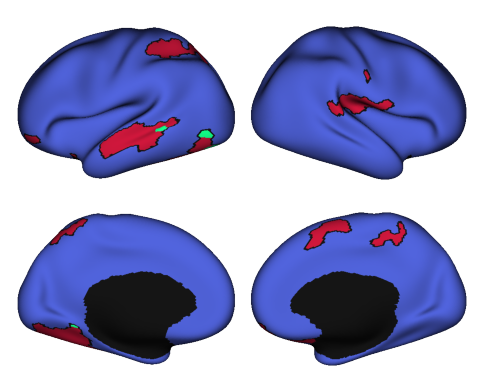

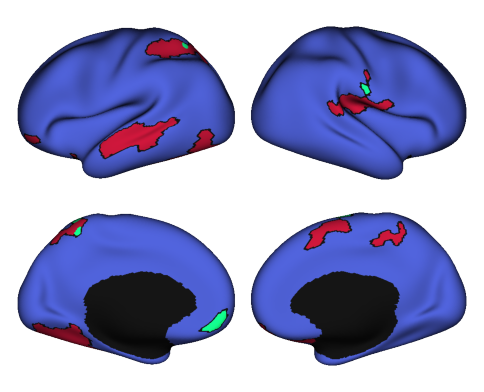

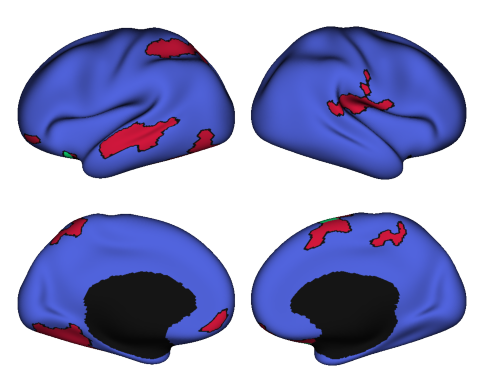

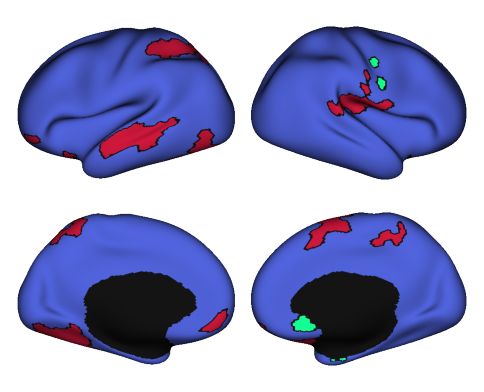

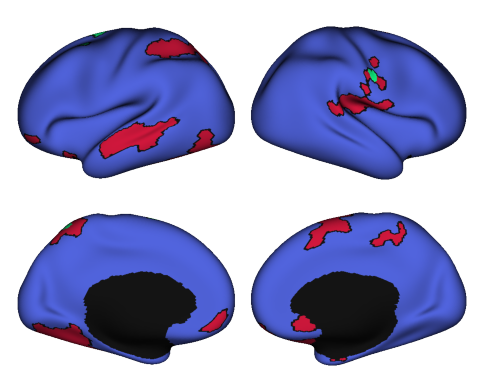

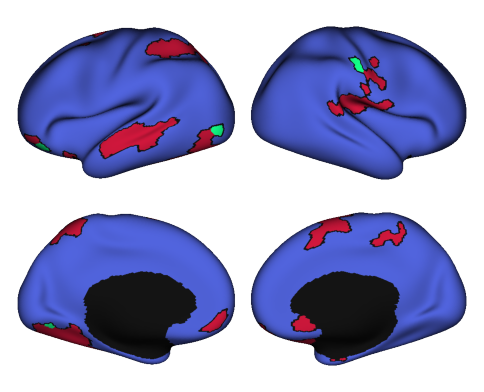

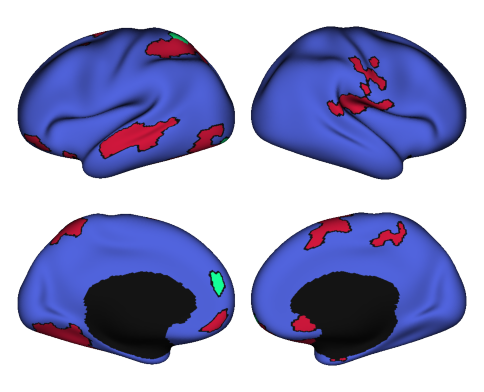

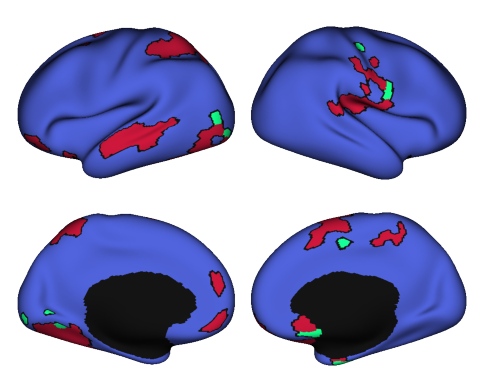

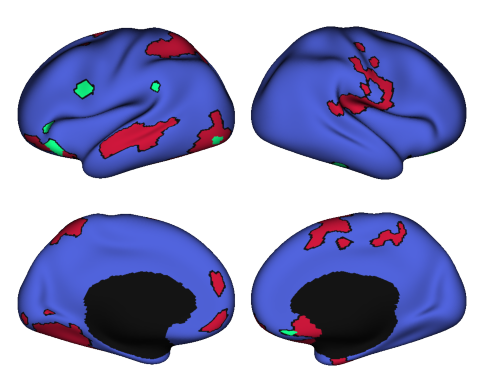

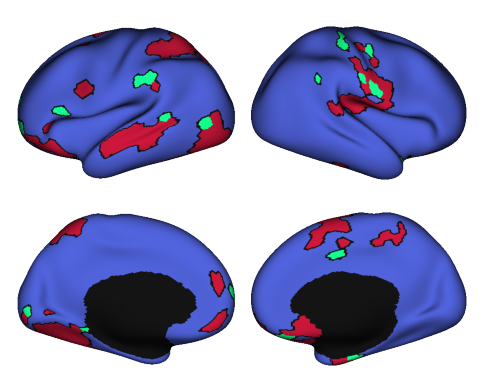

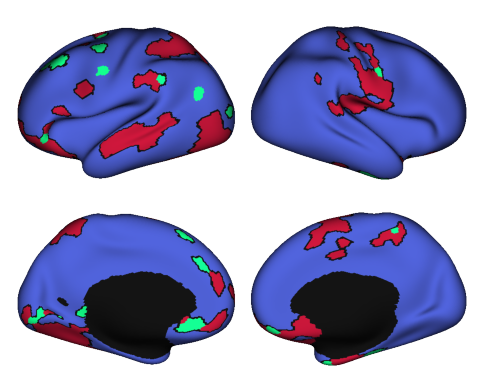

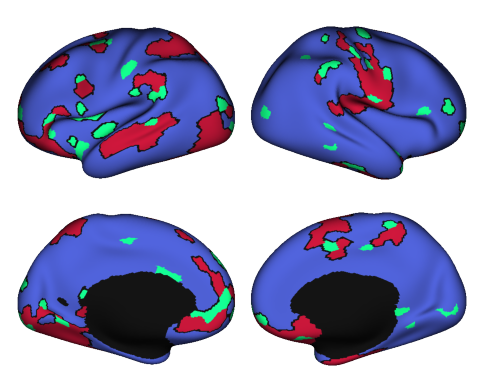

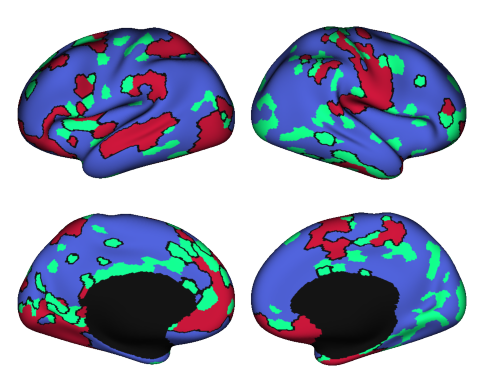

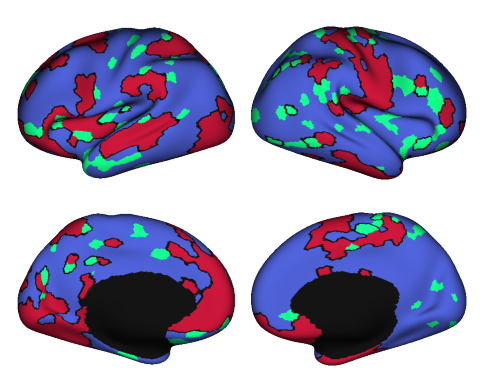

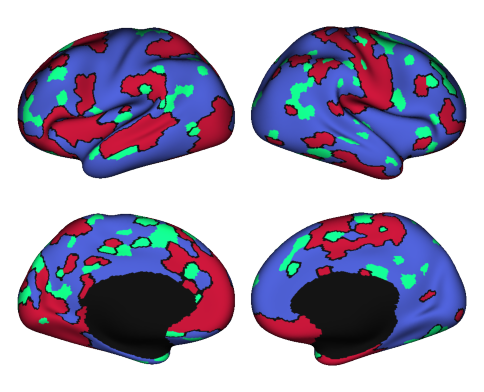

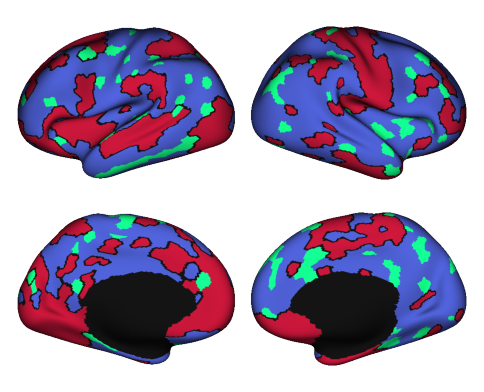

In [178]:
import matplotlib.pyplot as plt

# import matplotlib.animation as animation
lh, rh = surfaces['veryinflated']
n_features = np.loadtxt("../neurosynth/n_features.txt", dtype=str).tolist()
sulc_lh, sulc_rh = surfaces['sulc']


for i, n in enumerate(n_features):
    best_features = pd.read_csv(f"best_features/{n}_best_features.csv")
    best_features = best_features.filter(like='grad')

    regions_surf = get_feature_regions(best_features, True)
    imp_regions = Plot(lh, rh)
    imp_regions.add_layer({'left': regions_surf[:32492], 'right': regions_surf[32492:]}, cmap = "coolwarm", zero_transparent=False, cbar = False)

    if n != "100":
        prev_csv = f"{n_features[i - 1]}_best_features.csv"
        new_regions = get_additional_regions(pd.read_csv(f"best_features/{n}_best_features.csv"), pd.read_csv(f"best_features/{prev_csv}"), True)
        new_regions[new_regions == 0] = np.nan
        imp_regions.add_layer({'left': new_regions[:32492], 'right': new_regions[32492:]}, cmap = "winter", cbar=False, zero_transparent=False, as_outline = False)
    else:
        regions_surf[regions_surf == 0] = np.nan
        imp_regions.add_layer({'left': regions_surf[:32492], 'right': regions_surf[32492:]}, cmap = "winter", cbar=False, zero_transparent=False, as_outline = False)
    imp_regions.add_layer({'left': regions_surf[:32492], 'right': regions_surf[32492:]}, cmap='gray',
                as_outline=True, cbar=False)
    fig = imp_regions.build()
    fig.savefig(f"../../figures/cortex_regions/{n}_features_to_regions_cortex.svg", format = "svg", dpi = 300, bbox_inches='tight')
    

In [54]:
!pwd

/Users/VictoriaShevchenko/Documents/PhD/SCZ/modeling


In [58]:
n_features = np.loadtxt("../neurosynth/n_features.txt", dtype=str).tolist()

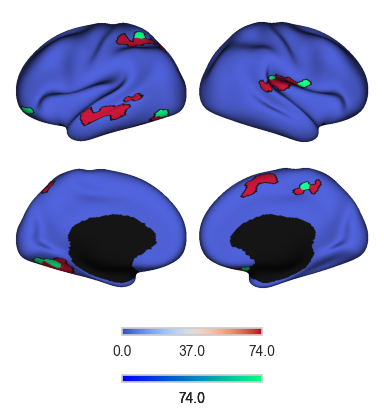

In [94]:

best_features = pd.read_csv(f"best_features/{n_features[3]}_best_features.csv")
regions_surf = get_feature_regions(best_features, True)
imp_regions = Plot(lh, rh)
imp_regions.add_layer({'left': regions_surf[:32492], 'right': regions_surf[32492:]}, cmap = "coolwarm", zero_transparent=False)
imp_regions.add_layer({'left': regions_surf[:32492], 'right': regions_surf[32492:]}, cmap='gray',
            as_outline=True, cbar=False)
prev_csv = f"{n_features[2]}_best_features.csv"
new_regions = get_additional_regions(pd.read_csv(f"best_features/{n_features[3]}_best_features.csv"), pd.read_csv(f"best_features/{prev_csv}"), True)
new_regions[new_regions == 0] = np.nan

imp_regions.add_layer({'left': new_regions[:32492], 'right': new_regions[32492:]}, cmap = "winter", cbar=True, zero_transparent=False, as_outline = False)
fig = imp_regions.build()

In [168]:
best_features = pd.read_csv(f"best_features/3000_best_features.csv")

In [172]:
def get_grads_from_features(df):
    grads = []
    #only keep the columns that are gradients
    for column in df.columns:
        if "grad" in column:
            value_index = int(column.split("_")[-1])
            i_grad = int(value_index/1000)
            grads.append(i_grad)
    return grads

In [169]:
int(999/1000)

0

In [162]:
all_grads = np.arange(0, 200)

In [163]:
all_grads

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [173]:
np.unique(get_grads_from_features(best_features))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  56,  57,  58,  60,  63,  64,  65,  66,  67,  68,
        69,  70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  80,  81,
        82,  83,  84,  85,  86,  87,  88,  89,  90,  91,  92,  93,  94,
        95,  96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107,
       108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
       121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
       134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
       147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159,
       160, 161, 162, 163, 164, 166, 168, 169, 170, 171, 172, 173, 174,
       175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 18

In [174]:
np.setdiff1d(all_grads, get_grads_from_features(best_features))

array([ 55,  59,  61,  62, 165, 167])

In [156]:
best_features.columns

Index(['grad_comb_200_aligned_128605', 'grad_comb_200_aligned_131005',
       'grad_comb_200_aligned_132005', 'grad_comb_200_aligned_124404',
       'grad_comb_200_aligned_24805', 'grad_comb_200_aligned_129605',
       'grad_comb_200_aligned_130605', 'grad_comb_200_aligned_131400',
       'grad_comb_200_aligned_29600', 'grad_comb_200_aligned_133000',
       ...
       'grad_comb_200_aligned_172800', 'grad_comb_200_aligned_69407',
       'grad_comb_200_aligned_117620', 'grad_comb_200_aligned_156600',
       'grad_comb_200_aligned_58805', 'grad_comb_200_aligned_85401',
       'grad_comb_200_aligned_31636', 'grad_comb_200_aligned_127223',
       'grad_comb_200_aligned_92805', 'grad_comb_200_aligned_32814'],
      dtype='object', length=4000)

In [25]:
len(get_additional_regions(pd.read_csv(f"best_features/200_best_features.csv"), pd.read_csv(f"best_features/100_best_features.csv"), False))

7

In [41]:
best_features = pd.read_csv(f"best_features/100_best_features.csv")
regions = get_feature_regions(best_features, surf = False)

In [45]:
np.where(regions != 0)[0]

array([  0,   1,   2,   4,   5, 200, 201, 202, 204, 205, 206, 400, 401,
       402, 404, 405, 406, 412, 600, 601, 602, 604, 605, 800, 801, 802,
       804, 805])

In [46]:
schaefer_coords[np.where(regions != 0)[0]]

array([[-34.78082902, -35.94818653, -23.95699482],
       [-34.44509689, -51.05695831, -18.71579565],
       [-25.52808989, -44.8227216 , -14.5980025 ],
       [-30.66666667, -42.93114241,  -8.88888889],
       [-34.38500315, -68.67233774, -15.84373031],
       [-19.46008869, -68.58536585,  46.26053215],
       [-32.45931284, -39.22965642,  42.48643761],
       [-28.46471601, -59.08605852,  50.85197935],
       [-27.75471698, -53.70754717,  49.03773585],
       [ -6.20957096, -76.70462046,  52.06435644],
       [-40.58721461, -35.45022831,  51.15799087],
       [-61.99310345, -33.12011494, -14.15344828],
       [-59.15505464,  -9.62943989, -14.08811475],
       [-64.45494994, -24.72191324,  -8.55506118],
       [-65.85185185, -36.69444444,  -5.85858586],
       [-51.88443936, -21.47025172,  -8.43249428],
       [-57.34237996, -31.2045929 ,  -4.7776618 ],
       [-59.95628415, -50.7704918 ,   6.20127505],
       [ 41.30664062, -27.33007812,  12.24609375],
       [ 43.31759657,  -2.63519

: 